In [1]:
"""
Steps:
1. describe the dataset
2. check missing value - J
3. Observation (Exploratory Data Analysis )
4. Visualize the Relationship -J
5. Deleteing Outliers - J
6. Correlation Matrix
7. Deleting 'Id' column and combining two datasets - J
8. Deal with missing data - J
9. Creating New Features(variables) - J
10. Deleting Features(variables) - J
11. Creating Dummy Variables - J
12. Partition the Dataset
13. Modeling the Data
"""

"\nSteps:\n1. describe the dataset\n2. check missing value - J\n3. Observation (Exploratory Data Analysis )\n4. Visualize the Relationship -J\n5. Deleteing Outliers - J\n6. Correlation Matrix\n7. Deleting 'Id' column and combining two datasets - J\n8. Deal with missing data - J\n9. Creating New Features(variables) - J\n10. Deleting Features(variables) - J\n11. Creating Dummy Variables - J\n12. Partition the Dataset\n13. Modeling the Data\n"

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split 
import statsmodels.tools.tools as stattools
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn.metrics as met


In [3]:
# set Jupyther Notebook to display interactive output for 100 columns and rows at maximum
pd.options.display.max_columns = 100
pd.options.display.max_columns = 100

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 1. Describe the Dataset

In [5]:
# describe the datasets

print(f"Train has {train.shape[0]} rows and  {train.shape[1]} columns")
print(f"Test has {test.shape[0]} rows and  {test.shape[1]} columns")

Train has 1460 rows and  81 columns
Test has 1459 rows and  80 columns


In [6]:
# gives us statistical info about the numerical variables

train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [7]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.0,1825.50,2190.0,2554.50,2919.0
MSSubClass,1459.0,57.378341,42.746880,20.0,20.00,50.0,70.00,190.0
LotFrontage,1232.0,68.580357,22.376841,21.0,58.00,67.0,80.00,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.00,9399.0,11517.50,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.00,6.0,7.00,10.0
OverallCond,1459.0,5.553804,1.113740,1.0,5.00,5.0,6.00,9.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.00,1973.0,2001.00,2010.0
YearRemodAdd,1459.0,1983.662783,21.130467,1950.0,1963.00,1992.0,2004.00,2010.0
MasVnrArea,1444.0,100.709141,177.625900,0.0,0.00,0.0,164.00,1290.0
BsmtFinSF1,1458.0,439.203704,455.268042,0.0,0.00,350.5,753.50,4010.0


In [8]:
'''Traing data set and test data set have identical columns names excpet SalePrice. Because of this, we need to partition the traning data set'''

'Traing data set and test data set have identical columns names excpet SalePrice. Because of this, we need to partition the traning data set'

In [9]:
# obtain information about the features
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
# get different types of objects
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

# 2. Checking Missing Values

In [11]:
# check missing value

# define a function to check the missing value percentage in each column
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)\
              [round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])


In [12]:
missing_percentage(train)

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


In [13]:
missing_percentage(test)

,Total,Percent
PoolQC,1456,99.79
MiscFeature,1408,96.50
Alley,1352,92.67
Fence,1169,80.12
FireplaceQu,730,50.03
LotFrontage,227,15.56
GarageCond,78,5.35
GarageQual,78,5.35
GarageYrBlt,78,5.35
GarageFinish,78,5.35


# 3. Observation (Exploratory Data Analysis )

Text(0.5, 1.0, 'SalePrice Histogram')

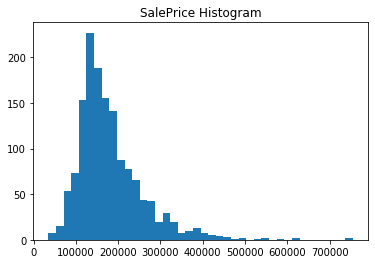

In [14]:
# Visulize target variable 'SalePrice'

plt.hist(train['SalePrice'], bins=40)
plt.title("SalePrice Histogram")

Text(0.5, 1.0, 'SalePrice Boxplot')

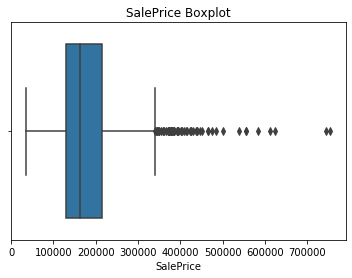

In [15]:
sns.boxplot(train['SalePrice'])
plt.title("SalePrice Boxplot")

In [16]:
# obtain the correlation of all the predictors(columns) with target variable. 
(train.corr())["SalePrice"].sort_values(ascending = False)[1:]

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

Text(0, 0.5, 'Frequency')

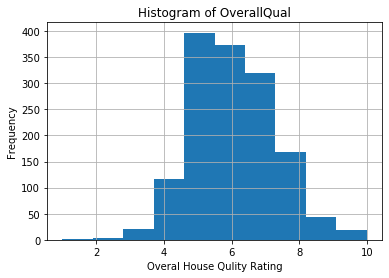

In [17]:
# visualize the variables with high correlation coefficient

train['OverallQual'].hist(bins=10)
plt.title('Histogram of OverallQual')
plt.xlabel('Overal House Qulity Rating')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

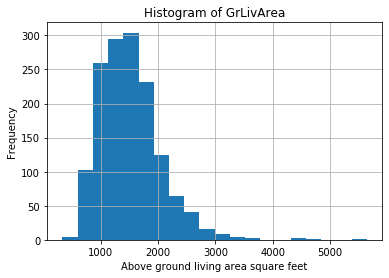

In [18]:
train['GrLivArea'].hist(bins=20)
plt.title('Histogram of GrLivArea')
plt.xlabel('Above ground living area square feet')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

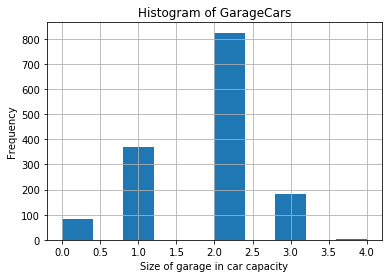

In [19]:
train['GarageCars'].hist()
plt.title('Histogram of GarageCars')
plt.xlabel('Size of garage in car capacity')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

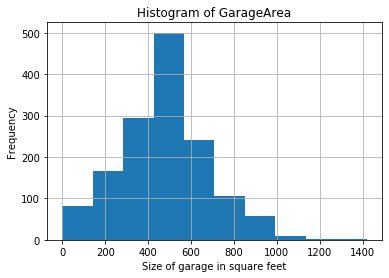

In [20]:
train['GarageArea'].hist()
plt.title('Histogram of GarageArea')
plt.xlabel('Size of garage in square feet')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

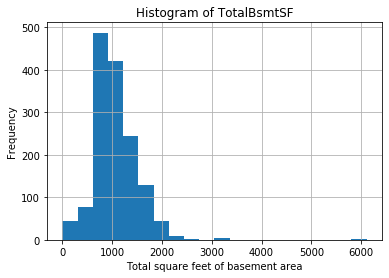

In [21]:
train['TotalBsmtSF'].hist(bins=20)
plt.title('Histogram of TotalBsmtSF')
plt.xlabel('Total square feet of basement area')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

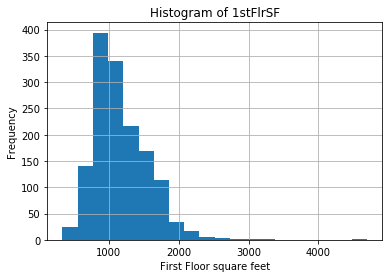

In [22]:
train['1stFlrSF'].hist(bins=20)
plt.title('Histogram of 1stFlrSF')
plt.xlabel('First Floor square feet')
plt.ylabel('Frequency')

# 4. Visualize the Relationship

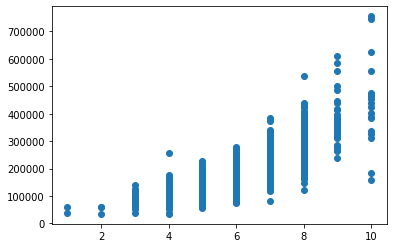

In [23]:
# visualize the relationship between variables and target variable SalePrice

#sns.scatterplot(train['OverallQual'], train['SalePrice'])
plt.scatter(train['OverallQual'], train['SalePrice'])

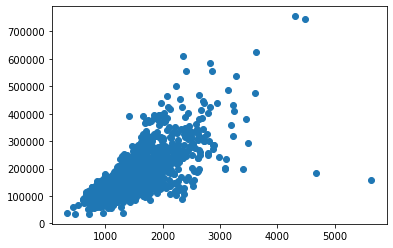

In [24]:
plt.scatter(train['GrLivArea'], train['SalePrice'])

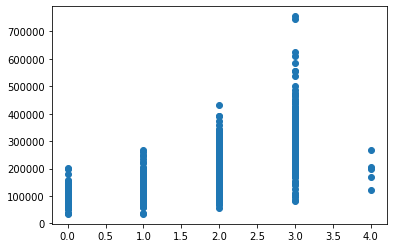

In [25]:
plt.scatter(train['GarageCars'], train['SalePrice'])

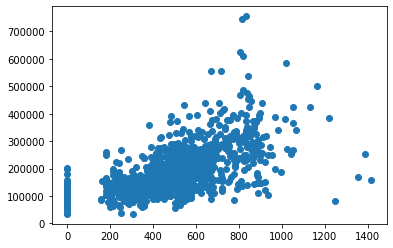

In [26]:
plt.scatter(train['GarageArea'], train['SalePrice'])

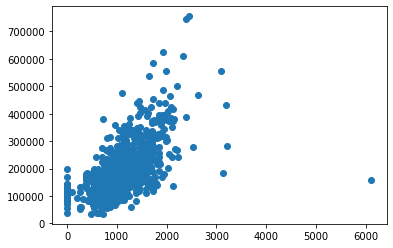

In [27]:
plt.scatter(train['TotalBsmtSF'], train['SalePrice'])

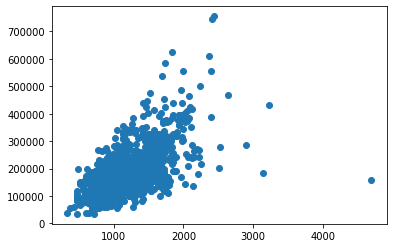

In [28]:
plt.scatter(train['1stFlrSF'], train['SalePrice'])

# 5. Deleteing Outliers 

In [29]:
## Deleting two outliers of GrLivArea variable. 
train = train[train.GrLivArea < 4500]
train.reset_index(drop = True, inplace = True)

train.shape

(1458, 81)

# 6. Correlation Matrix

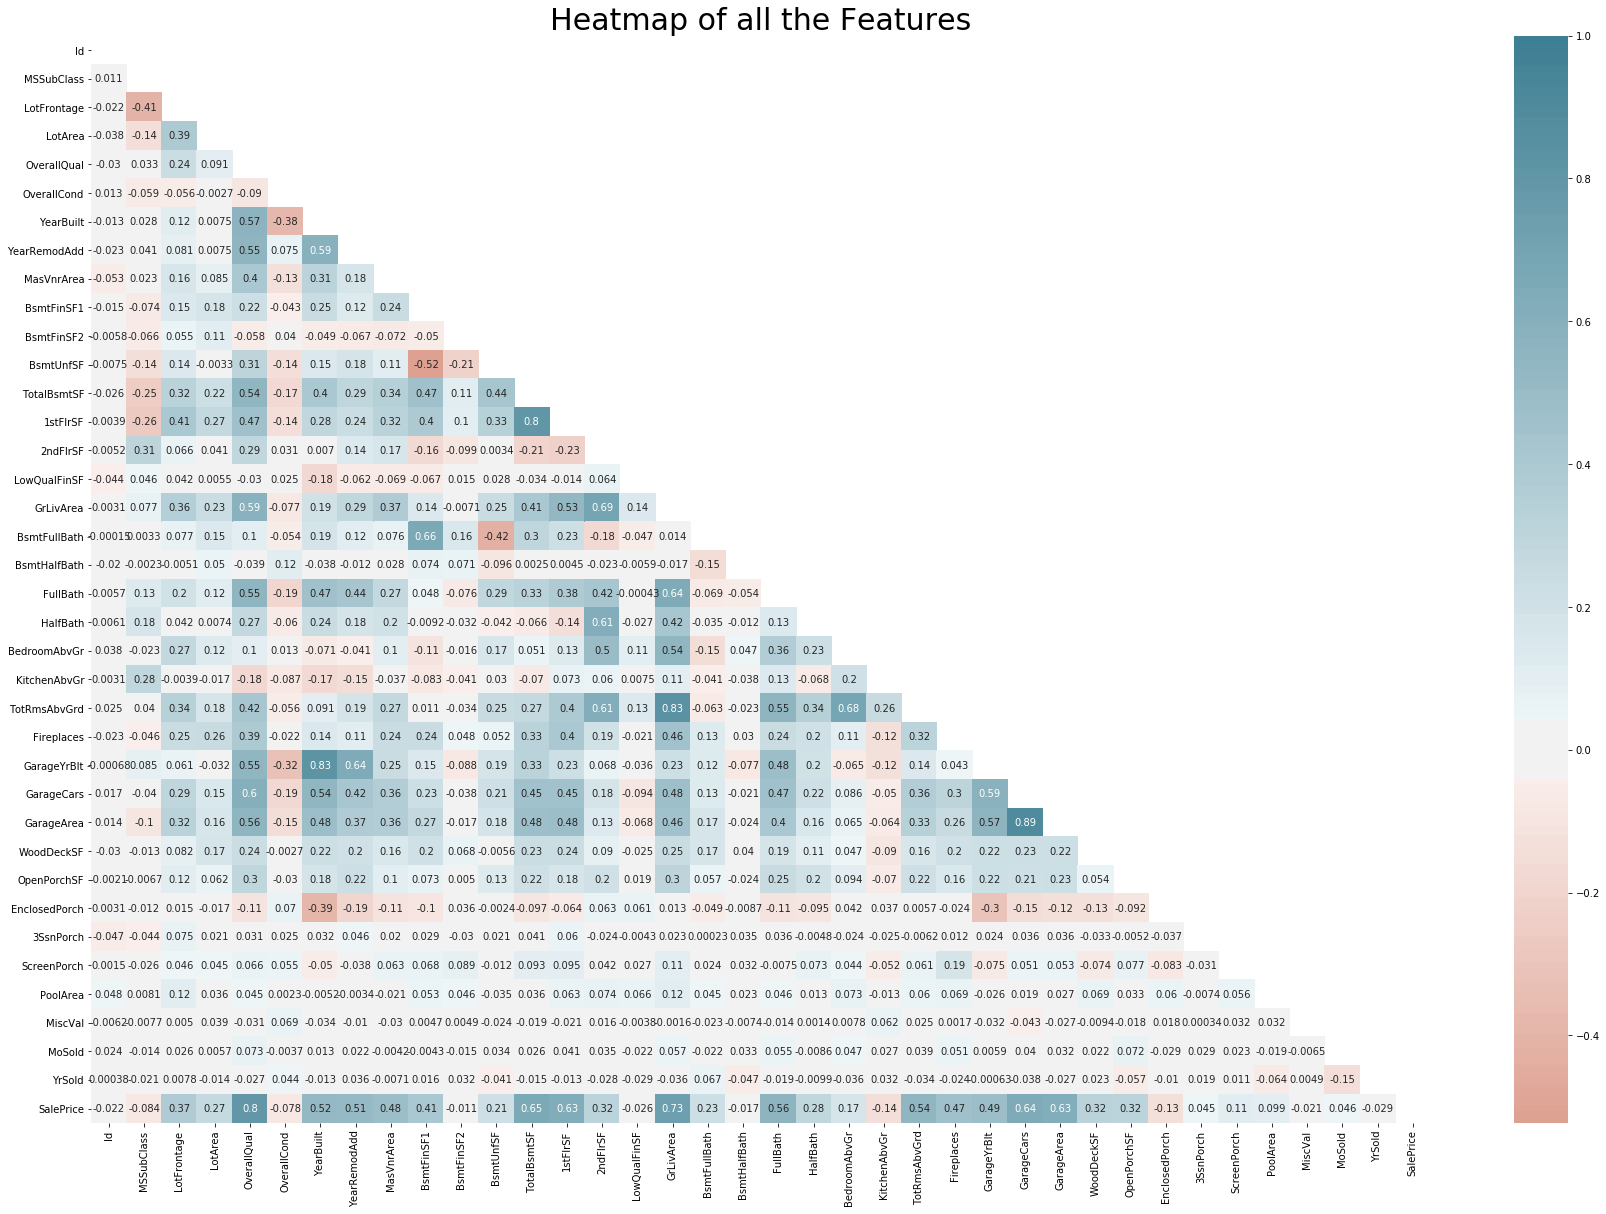

In [30]:
#correlation matrix (heatmap)

plt.subplots(figsize = (30,20))
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(train.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0, 
           );
plt.title("Heatmap of all the Features", fontsize = 30);

# 7. Deleting 'Id' Column and Combining Two Datasets

In [31]:
# Dropping the "Id" from train and test set. 
train.drop(columns=['Id'],axis=1, inplace=True)
test.drop(columns=['Id'],axis=1, inplace=True)

# Saving the target values in "y_train". 
y = train['SalePrice'].reset_index(drop=True)

train.shape, test.shape, len(y)

((1458, 80), (1459, 79), 1458)

In [32]:
# getting a copy of train
previous_train = train.copy()

In [33]:
#  categorical feature encoding

# This function takes a dataframe, a feature(a categorical feature) and a target_feature(the feature that should be used for encoding)
# and returns a new feature with the original feature name + postfix(_E). 

# Combining train and test datasets together so that we can do all the work at once. 


In [34]:
# Combining train and test datasets together so that we can do all the data cleaning work at once
all_data = pd.concat((train, test)).reset_index(drop = True)
# Dropping the target variable. 
all_data.drop(['SalePrice'], axis = 1, inplace = True)

all_data.shape

(2917, 79)

# 8. Dealing with Missing Values

In [35]:
# check missing data in all_data
missing_percentage(all_data)

,Total,Percent
PoolQC,2908,99.69
MiscFeature,2812,96.40
Alley,2719,93.21
Fence,2346,80.43
FireplaceQu,1420,48.68
LotFrontage,486,16.66
GarageCond,159,5.45
GarageQual,159,5.45
GarageYrBlt,159,5.45
GarageFinish,159,5.45


In [36]:
# Imputing Missing Values

# Some missing values are intentionally left blank, for example: 
# In the Alley feature, there are blank values meaning that there are no alley's in that specific house. 
missing_val_col = ["Alley", 
                   "PoolQC", 
                   "MiscFeature",
                   "Fence",
                   "FireplaceQu",
                   "GarageType",
                   "GarageFinish",
                   "GarageQual",
                   "GarageCond",
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'MasVnrType']

for i in missing_val_col:
    all_data[i] = all_data[i].fillna('None')


In [37]:
# In the following features the null values are there for a purpose, so we replace them with "0"
missing_val_col2 = ['BsmtFinSF1',
                    'BsmtFinSF2',
                    'BsmtUnfSF',
                    'TotalBsmtSF',
                    'BsmtFullBath', 
                    'BsmtHalfBath', 
                    'GarageYrBlt',
                    'GarageArea',
                    'GarageCars',
                    'MasVnrArea']

for i in missing_val_col2:
    all_data[i] = all_data[i].fillna(0)

In [38]:
# Important years and months that should be categorical variables not numerical. 
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str) 

# MSSubClass(type of dwelling) are given in numerical; therefore converted to categorical variables. 
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)

In [39]:
# Replace all missing values in LotFrontage with the median value of each neighborhood. 
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.mean()))

In [40]:
# Replace all missing values in MSZoning by imputing the most often value of each MSSubClass(type of dwelling). 
all_data['MSZoning'] = all_data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [41]:
# using mode() function to fill up the value that appears the most often in column.

all_data['Functional'] = all_data['Functional'].fillna('Typ') 
all_data['Utilities'] = all_data['Utilities'].fillna('AllPub') 
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0]) 
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna("TA") 
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna("SBrkr") 


In [42]:
missing_percentage(all_data)

,Total,Percent


In [43]:
"""
# Fixing Skewness
No time to dive deep, maybe skip it
"""

'\n# Fixing Skewness\nNo time to dive deep, maybe skip it\n'

# 9. Creating New Features

In [44]:
# creating new features (variables) 

all_data['TotalSF'] = (all_data['TotalBsmtSF'] 
                       + all_data['1stFlrSF'] 
                       + all_data['2ndFlrSF'])

all_data['YrBltAndRemod'] = all_data['YearBuilt'] + all_data['YearRemodAdd']

all_data['Total_sqr_footage'] = (all_data['BsmtFinSF1'] 
                                 + all_data['BsmtFinSF2'] 
                                 + all_data['1stFlrSF'] 
                                 + all_data['2ndFlrSF'])
                                 
all_data['Total_Bathrooms'] = (all_data['FullBath'] 
                               + (0.5 * all_data['HalfBath']) 
                               + all_data['BsmtFullBath'] 
                               + (0.5 * all_data['BsmtHalfBath']))
                               

all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] 
                              + all_data['3SsnPorch'] 
                              + all_data['EnclosedPorch'] 
                              + all_data['ScreenPorch'] 
                              + all_data['WoodDeckSF'])

all_data['TotalSF'], all_data['YrBltAndRemod'], all_data['Total_sqr_footage'], all_data['Total_porch_sf']

(0       2566.0
 1       2524.0
 2       2706.0
 3       2473.0
 4       3343.0
          ...  
 2912    1638.0
 2913    1638.0
 2914    2448.0
 2915    1882.0
 2916    2996.0
 Name: TotalSF, Length: 2917, dtype: float64,
 0       4006
 1       3952
 2       4003
 3       3885
 4       4000
         ... 
 2912    3940
 2913    3940
 2914    3956
 2915    3984
 2916    3987
 Name: YrBltAndRemod, Length: 2917, dtype: int64,
 0       2416.0
 1       2240.0
 2       2272.0
 3       1933.0
 4       2853.0
          ...  
 2912    1092.0
 2913    1344.0
 2914    2448.0
 2915    1307.0
 2916    2758.0
 Name: Total_sqr_footage, Length: 2917, dtype: float64,
 0        61
 1       298
 2        42
 3       307
 4       276
        ... 
 2912      0
 2913     24
 2914    474
 2915    112
 2916    238
 Name: Total_porch_sf, Length: 2917, dtype: int64)

In [45]:
all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [46]:
all_data.shape

(2917, 89)

# 10. Deleting Features

In [47]:
all_data = all_data.drop(columns= ['Utilities', 'Street', 'PoolQC'])

all_data.shape

(2917, 86)

# 11. Creating Dummy Variables

In [48]:
# Creating dummy variable 
final_features = pd.get_dummies(all_data).reset_index(drop=True)
final_features.shape

(2917, 333)

In [49]:
# check the result

final_features

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF,YrBltAndRemod,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,...,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2566.0,4006,2416.0,3.5,61,0,1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,2524.0,3952,2240.0,2.5,298,0,0,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,2706.0,4003,2272.0,3.5,42,0,1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2473.0,3885,1933.0,2.0,307,0,1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,3343.0,4000,2853.0,3.5,276,0,1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1638.0,3940,1092.0,1.5,0,0,1,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2913,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,1638.0,3940,1344.0,1.5,24,0,1,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2914,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,2448.0,3956,2448.0,2.0,474,0,0,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2915,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,0.0,0.0,0.0,80,32,0,0,0,0,

In [50]:
# select all rows from the 1st row to the number of row which number is the length of predictor y and save to X
X = final_features.iloc[:len(y), :]

# select the rest of the rows and save to X_sub
X_sub = final_features.iloc[len(y):, :]

In [51]:
X

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF,YrBltAndRemod,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,...,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2566.0,4006,2416.0,3.5,61,0,1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,2524.0,3952,2240.0,2.5,298,0,0,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,2706.0,4003,2272.0,3.5,42,0,1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2473.0,3885,1933.0,2.0,307,0,1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,3343.0,4000,2853.0,3.5,276,0,1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,62.0,7917,6,5,1999,2000,0.0,0.0,0.0,953.0,953.0,953,694,0,1647,0.0,0.0,2,1,3,1,7,1,1999.0,2.0,460.0,0,40,0,0,0,0,0,2600.0,3999,1647.0,2.5,40,0,1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1454,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,589.0,1542.0,2073,0,0,2073,1.0,0.0,2,0,3,1,7,2,1978.0,2.0,500.0,349,0,0,0,0,0,0,3615.0,3966,3026.0,3.0,349,0,0,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1455,66.0,9042,7,9,1941,2006,0.0,275.0,0.0,877.0,1152.0,1188,1152,0,2340,0.0,0.0,2,0,4,1,9,2,1941.0,1.0,252.0,0,60,0,0,0,0,2500,3492.0,3947,2615.0,2.0,60,0,1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1456,68.0,9717,5,6,1950,1996,0.0,49.0,1029.0,0.0,1078.0,1078,0,0,1078,1.0,0.0,1,0,2,1,5,0,1950.0,

In [52]:
X_sub

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF,YrBltAndRemod,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,...,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1458,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,1778.0,3922,1508.0,1.0,260,0,0,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1459,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,2658.0,3916,2252.0,1.5,429,0,0,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1460,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,2557.0,3995,2420.0,2.5,246,0,1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1461,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,2530.0,3996,2206.0,2.5,396,0,1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1462,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,2560.0,3984,1543.0,2.0,226,0,0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1638.0,3940,1092.0,1.5,0,0,1,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2913,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,1638.0,3940,1344.0,1.5,24,0,1,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2914,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,2448.0,3956,2448.0,2.0,474,0,0,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2915,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,0.0,

In [53]:
"""Skip from drop outliers[30, 88, 462, 631, 1322] to functoin overfit_reducer()"""

'Skip from drop outliers[30, 88, 462, 631, 1322] to functoin overfit_reducer()'

In [54]:
X.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=333)

# 12. Partition the Dataset

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state = 0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((976, 333), (976,), (482, 333), (482,))

# 13. Modeling the Data

In [56]:
# run the LinearRegression model

# call the LinearRegression object
lin_reg = LinearRegression(normalize=True, n_jobs=-1)
# fit train and test data 
lin_reg.fit(X_train, y_train)
#Predict test data. 
y_pred = lin_reg.predict(X_test)

In [57]:
# get average squared error(MSE) by comparing predicted values with real values
print('MSE: %.2f'%mean_squared_error(y_test, y_pred))

MSE: 2601897786330418329859613937106944.00


In [58]:
# get mean absolute error(MAE) by comparing predicted values with real values
print('MAE: %.2f'%met.mean_absolute_error(y_true=y_test, y_pred=y_pred))

# A small MAE suggests the model is great at prediction, while a large MAE suggests that your model may have trouble in certain areas. 
# A MAE of 0 means that your model is a perfect predictor of the outputs (but this will almost never happen).

MAE: 5422421270079233.00


In [59]:
# run multiple regression model
X_mul = sm.add_constant(X_train)
model01 = sm.OLS(y_train, X_mul).fit()
model01.summary()

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     55.07
Date:                Wed, 30 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:22:58   Log-Likelihood:                -10896.
No. Observations:                 976   AIC:                         2.232e+04
Df Residuals:                     712   BIC:                         2.361e+04
Df Model:                         263                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -8.424e+04   2.06e+04     -4.089      0.000   -1.25e+05   -4.38e+04
LotFrontage              38.9170     52.018      0.748      0.455     -63.211     141.045
LotArea                   0.6091      0.121      5.054      0.000       0.373       0.846
OverallQual            6700.1146   1202.590      5.571      0.000    4339.068    9061.161
OverallCond            6828.2254   1041.701      6.555      0.000    4783.052    8873.399
YearBuilt               249.3521     72.486      3.440      0.001     107.040     391.664
YearRemodAdd            -97.8068     57.461     -1.702      0.089    -210.620      15.006
MasVnrArea               26.9003      6.741      3.991      0.000      13.666      40.135
BsmtFinSF1                4.5864      4.456      1.029      0.304      -4.163      13.336
BsmtFinSF2               -8.8703      7.330     -1.210      0.227     -23.262       5.521
BsmtUnfSF                 2.2697      2.426      0.936      0.350      -2.494       7.033
TotalBsmtSF              -2.0142      5.470     -0.368      0.713     -12.753       8.725
1stFlrSF                 -1.6313      6.293     -0.259      0.796     -13.987      10.724
2ndFlrSF                 26.4256      5.607      4.713      0.000      15.418      37.433
LowQualFinSF            -17.3191     14.685     -1.179      0.239     -46.150      11.511
GrLivArea                 7.4752      8.845      0.845      0.398      -9.889      24.840
BsmtFullBath          -2204.6275   1750.512     -1.259      0.208   -5641.410    1232.156
BsmtHalfBath          -1399.4966   3204.372     -0.437      0.662   -7690.644    4891.651
FullBath               4587.8888   1866.995      2.457      0.014     922.415    8253.363
HalfBath               1680.5003   2159.554      0.778      0.437   -2559.355    5920.356
BedroomAbvGr          -5459.0696   1667.493     -3.274      0.001   -8732.860   -2185.279
KitchenAbvGr          -9155.0179   7313.008     -1.252      0.211   -2.35e+04    5202.621
TotRmsAbvGrd           1021.3106   1091.540      0.936      0.350   -1121.712    3164.333
Fireplaces             7737.2974   2808.217      2.755      0.006    2223.921    1.33e+04
GarageYrBlt             -11.5402     71.744     -0.161      0.872    -152.395     129.314
GarageCars             -180.8950   2821.062     -0.064      0.949   -5719.490    5357.700
GarageArea               23.7866      9.986      2.382      0.017       4.181      43.392
WoodDeckSF               -2.8679      7.850     -0.365      0.715     -18.279      12.543
OpenPorchSF              11.1236     12.653      0.879      0.380     -13.717      35.964
EnclosedPorch            -9.1688     12.144     -0.755      0.450     -33.011      14.673
3SsnPorch                 6.8509     22.221      0.308      0.758     -36.777      50.478
ScreenPorch            

In [60]:
X_mul.shape

(976, 334)

In [61]:
y_train.shape

(976,)

In [62]:
# splitting the data into Quantitative and Qualitative variables

quan_columns = [col for col in train if train.dtypes[col] != 'object']
qual_columns = [col for col in train if train.dtypes[col] == 'object']

quan_columns, qual_columns

(['MSSubClass',
  'LotFrontage',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageYrBlt',
  'GarageCars',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  'EnclosedPorch',
  '3SsnPorch',
  'ScreenPorch',
  'PoolArea',
  'MiscVal',
  'MoSold',
  'YrSold',
  'SalePrice'],
 ['MSZoning',
  'Street',
  'Alley',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'Heating',

In [63]:
train['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards     98
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

Text(0.5, 0, 'Neighborhood')

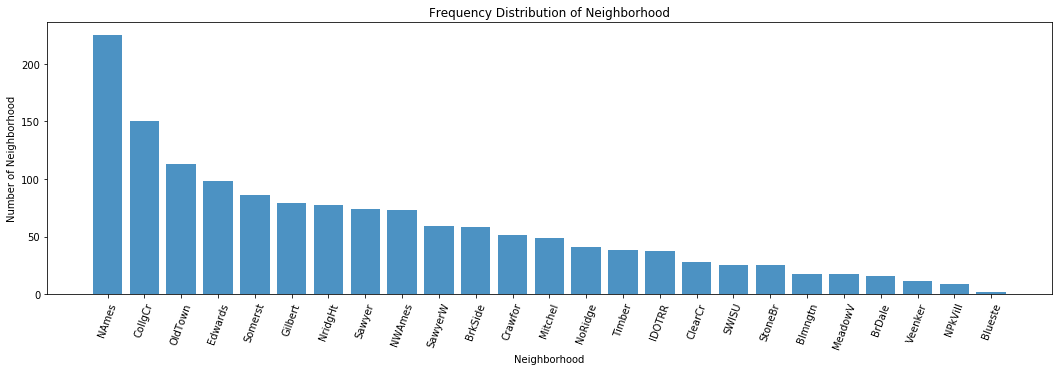

In [64]:
neighborhood_count = train['Neighborhood'].value_counts()
f, ax = plt.subplots(figsize=(18,5))
plt.bar(neighborhood_count.index, neighborhood_count.values, alpha=0.8)
plt.xticks(rotation=70)
plt.title('Frequency Distribution of Neighborhood')
plt.ylabel('Number of Neighborhood')
plt.xlabel('Neighborhood')

Text(0, 0.5, 'Frequency')

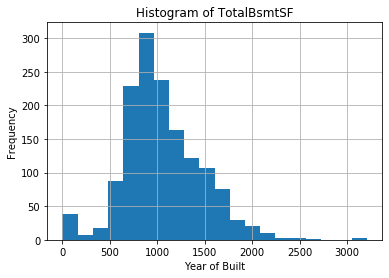

In [65]:
train['TotalBsmtSF'].hist(bins=20)
plt.title('Histogram of TotalBsmtSF')
plt.xlabel('Year of Built')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

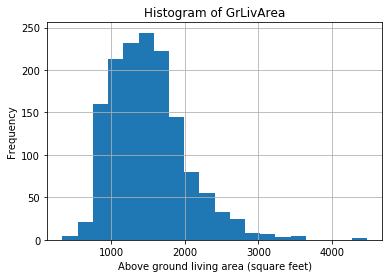

In [66]:
train['GrLivArea'].hist(bins=20)
plt.title('Histogram of GrLivArea')
plt.xlabel('Above ground living area (square feet)')
plt.ylabel('Frequency')

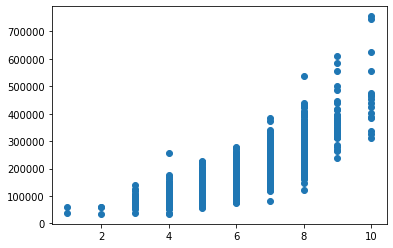

In [67]:
# visualize the relationship between variables OverallQual, YearBuilt, TotalBsmtSF, GrLivArea and target variable SalePrice

#sns.scatterplot(train['OverallQual'], train['SalePrice'])
plt.scatter(train['OverallQual'], train['SalePrice'])

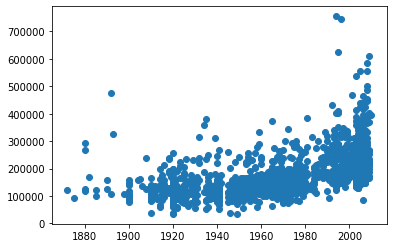

In [68]:
plt.scatter(train['YearBuilt'], train['SalePrice'])

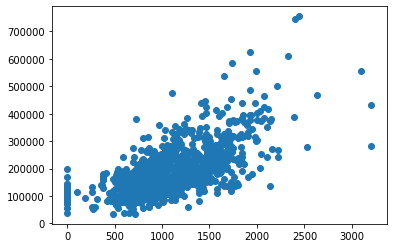

In [69]:
plt.scatter(train['TotalBsmtSF'], train['SalePrice'])

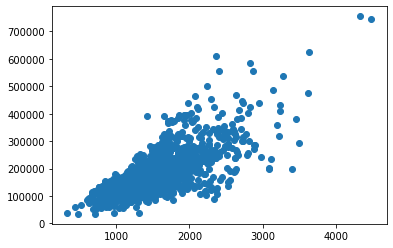

In [70]:
plt.scatter(train['GrLivArea'], train['SalePrice'])

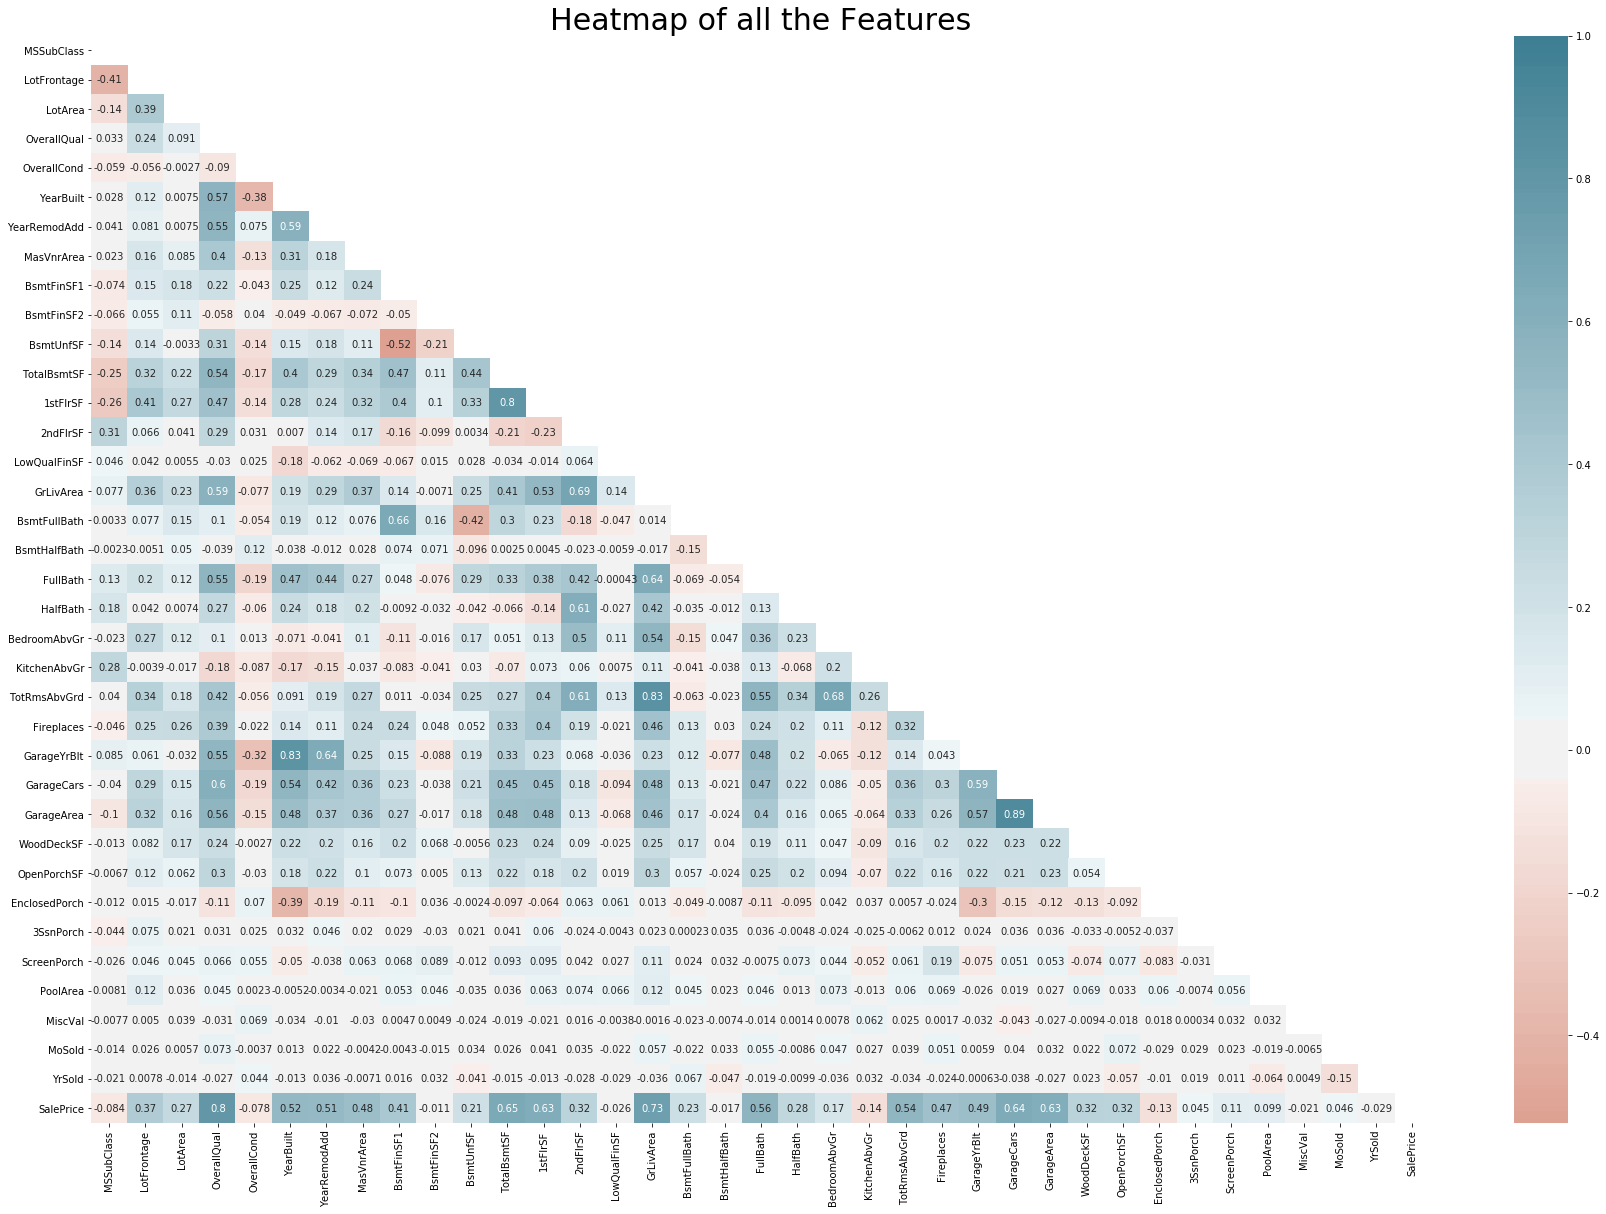

In [71]:
#correlation matrix (heatmap)

plt.subplots(figsize = (30,20))
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(train.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0, 
           );
plt.title("Heatmap of all the Features", fontsize = 30);

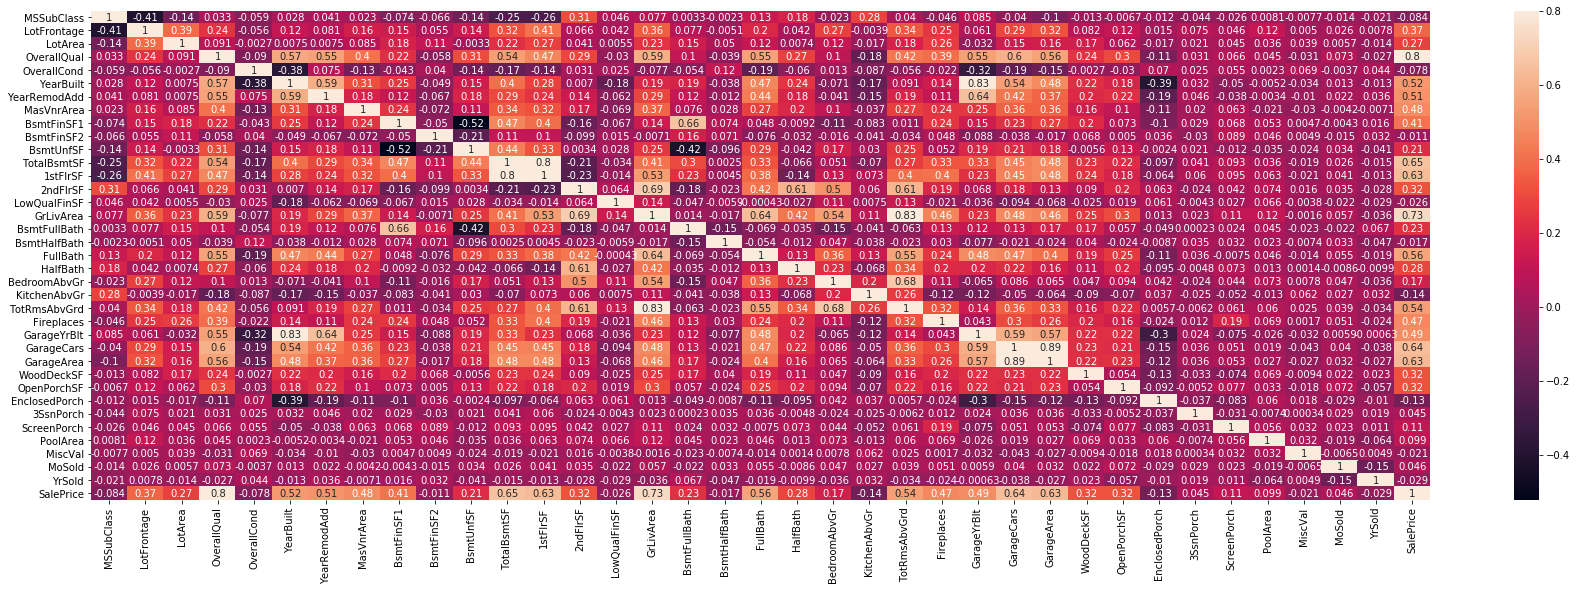

In [72]:
#correlation matrix (heatmap)
corrmat = train.corr()
f, ax = plt.subplots(figsize=(30, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);

In [73]:
# obtain the correlation of all the predictors(columns) with target variable. 
(train.corr()**2)["SalePrice"].sort_values(ascending = False)[1:]

# why **2 ?

OverallQual      0.633257
GrLivArea        0.540178
TotalBsmtSF      0.424000
GarageCars       0.410941
1stFlrSF         0.398831
GarageArea       0.395915
FullBath         0.316029
TotRmsAbvGrd     0.289195
YearBuilt        0.274166
YearRemodAdd     0.257776
GarageYrBlt      0.237321
MasVnrArea       0.233018
Fireplaces       0.220771
BsmtFinSF1       0.167595
LotFrontage      0.137333
WoodDeckSF       0.105468
OpenPorchSF      0.103132
2ndFlrSF         0.102740
HalfBath         0.080992
LotArea          0.071920
BsmtFullBath     0.052193
BsmtUnfSF        0.045993
BedroomAbvGr     0.028306
KitchenAbvGr     0.018481
EnclosedPorch    0.016550
ScreenPorch      0.012413
PoolArea         0.009898
MSSubClass       0.007102
OverallCond      0.006076
MoSold           0.002127
3SsnPorch        0.001986
YrSold           0.000834
LowQualFinSF     0.000657
MiscVal          0.000450
BsmtHalfBath     0.000285
BsmtFinSF2       0.000130
Name: SalePrice, dtype: float64

In [74]:
"""Based on the correlation coefficient we obtained, we chose the variables's correlation coefficient >=0.3, which are OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd""" 

"Based on the correlation coefficient we obtained, we chose the variables's correlation coefficient >=0.3, which are OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd"

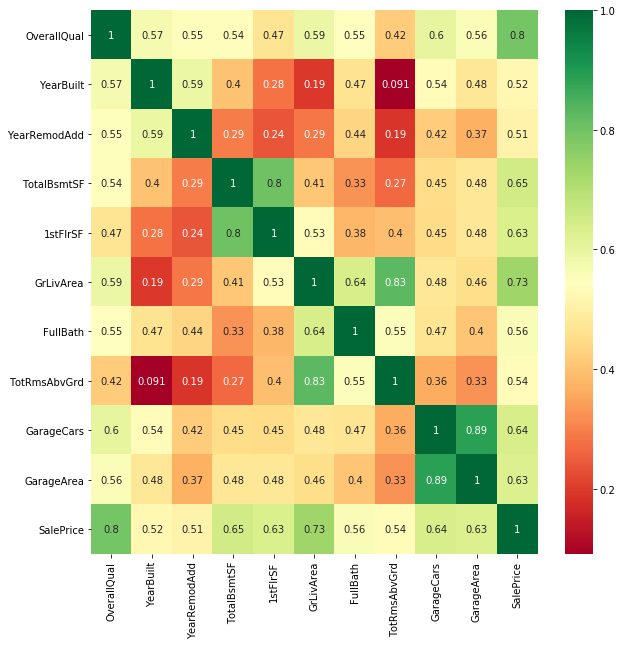

In [75]:
# most correlated features

corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [76]:
# drop variables if the missing value is more than 80% 



In [77]:
"""
# Based on our commen sense, Neighborhood is one of the most revevant factors to a house selling price

# convert catagorical variable Neighborhood into numerical 

# convert the unique categorical value into a dictionary
neighborhood_label = train['Neighborhood'].astype('category').cat.categories.tolist()
neighborhood_replace_map_comp = {'Neighborhood': {k: v for k,v in zip(neighborhood_label, list(range(1, len(neighborhood_label)+1)))}}
neighborhood_replace_map_comp

"""

"\n# Based on our commen sense, Neighborhood is one of the most revevant factors to a house selling price\n\n# convert catagorical variable Neighborhood into numerical \n\n# convert the unique categorical value into a dictionary\nneighborhood_label = train['Neighborhood'].astype('category').cat.categories.tolist()\nneighborhood_replace_map_comp = {'Neighborhood': {k: v for k,v in zip(neighborhood_label, list(range(1, len(neighborhood_label)+1)))}}\nneighborhood_replace_map_comp\n\n"

In [78]:
"""
# replace the categorical value into numerical
train.replace(neighborhood_replace_map_comp, inplace=True)
train.head()

"""

'\n# replace the categorical value into numerical\ntrain.replace(neighborhood_replace_map_comp, inplace=True)\ntrain.head()\n\n'

In [79]:
"""
# run RandomForestRegressor function

# pull data into target (y) and predictors (X)
train_y = train.SalePrice
predictor_cols = ['LotArea', 'OverallQual', 'YearBuilt', 'TotRmsAbvGrd']

# Create training predictors data
train_X = train[predictor_cols]

my_model = RandomForestRegressor()
my_model.fit(train_X, train_y)

"""

"\n# run RandomForestRegressor function\n\n# pull data into target (y) and predictors (X)\ntrain_y = train.SalePrice\npredictor_cols = ['LotArea', 'OverallQual', 'YearBuilt', 'TotRmsAbvGrd']\n\n# Create training predictors data\ntrain_X = train[predictor_cols]\n\nmy_model = RandomForestRegressor()\nmy_model.fit(train_X, train_y)\n\n"

In [80]:
# partition the zillowtr data set 
#train_sample, test_sample = train_test_split(train, test_size=0.33, random_state=7)
#train.shape, train_sample.shape, test_sample.shape

In [81]:
train_sample.SalePrice.describe()

NameError: name 'train_sample' is not defined

In [ ]:
test_sample.SalePrice.describe()

In [ ]:
"""
# Run a multiple regression model to predict SalePrice

# separate the predictor variables and the target variable and save into dataframe format
x = pd.DataFrame(train_sample[['Neighborhood','OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'FullBath', '1stFlrSF', 'TotRmsAbvGrd']])

x = sm.add_constant(x)

y = pd.DataFrame(train_sample['SalePrice'])
model01 = sm.OLS(y, x).fit()
model01.summary()

"""

In [ ]:
'''Since the p value of variables GarageArea, FullBath, 1stFlrSF are larger than 0.05, we will remove these variables from the prediction mode. '''

In [ ]:
"""
# run the model again with 3 variables removed
x = pd.DataFrame(train_sample[['Neighborhood','OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'TotRmsAbvGrd']])

x = sm.add_constant(x)

y = pd.DataFrame(train_sample['SalePrice'])
model02 = sm.OLS(y, x).fit()
model02.summary()

"""

In [ ]:
"""
# To verify the regression model results, we run the same code on the test data set

# separate the predictor variables and the target variable and save into dataframe format
x = pd.DataFrame(test_sample[['Neighborhood','OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'TotRmsAbvGrd']])

x = sm.add_constant(x)

y = pd.DataFrame(test_sample['SalePrice'])
model03 = sm.OLS(y, x).fit()
model03.summary()


"""

In [ ]:
"""
## fill in missing values
final_features = pd.get_dummies(all_data).reset_index(drop=True)
final_features.shape

for i in missing_val_col:
    all_data[i] = all_data[i].fillna('None')
    
    
for i in missing_val_col2:
    all_data[i] = all_data[i].fillna(0)
    
X = X.drop(overfitted_features, axis=1)


"""